# Simulating a Lotka-Volterra system with python

Here we do a very simple simulator of the simplest Lotka-Volterra system, https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations, i.e., a system whose ODE is defined as:

In [2]:
def myModel(y, t):
    #
    # parameters
    alpha = 1.1
    beta  = 0.7
    gamma = 0.4
    delta = 0.1
    #
    # get the individual variables - for readability
    yPrey = y[0]
    yPred = y[1]
    #
    # individual derivatives
    dyPreydt  =   alpha * yPrey - beta  * yPrey * yPred
    dyPreddt  = - gamma * yPred + delta * yPrey * yPred
    #
    return [ dyPreydt, dyPreddt ]

The code below will thus define first the packages needed to run the simulation, and then execute the main call to the function that solves numerically the ODE above.

In [3]:
# load the necessary packages
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [6]:
# define the initial conditions
y0 = [ 6.5, 1.73 ] # preys, predators

# define the time points where the solution is computed
n    = 1000
tmax = 70
t    = np.linspace(0, tmax, n)

# solve the ODE
y = odeint(myModel, y0, t)

# get the individual variables
yPrey = y[:,0]
yPred = y[:,1]

The next cell will plot the results obtained above.

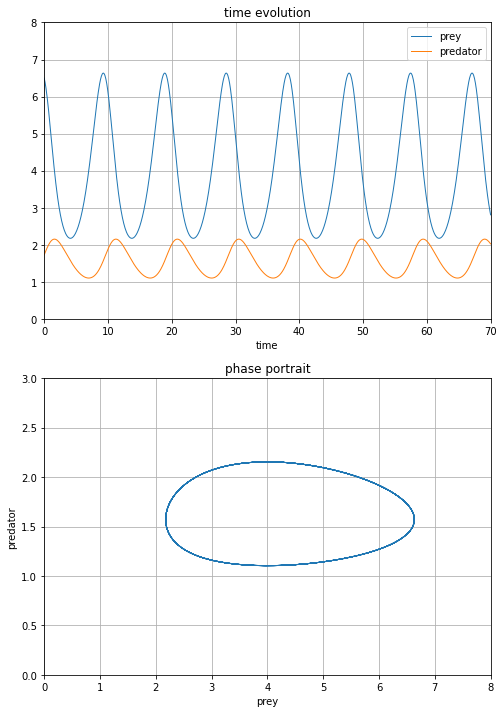

In [13]:
# create two subfigures (stacked vertically)
fig, ax = plt.subplots(2, 1, figsize=(8,12))

# plot the time evolution
ax[0].plot(t, yPrey, label='prey', linewidth=1)
ax[0].plot(t, yPred, label='predator', linewidth=1)
ax[0].grid()
ax[0].set_xlim([0, tmax])
ax[0].set_ylim([0, np.ceil( np.max([ yPred, yPrey ]) * 1.1 ) ] )
ax[0].legend(loc = 'upper right')
ax[0].set_xlabel('time')
ax[0].set_title('time evolution')

# plot the phase portrait
ax[1].plot(yPrey, yPred, linewidth=1)
ax[1].grid()
ax[1].set_xlim([0, np.ceil( np.max(yPrey) * 1.1 )])
ax[1].set_ylim([0, np.ceil( np.max(yPred) * 1.1 )])
ax[1].set_xlabel('prey')
ax[1].set_ylabel('predator')
ax[1].set_title('phase portrait')

plt.show()